### Import Libraries

In [118]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
from scipy.special import inv_boxcox

### Glimpse Data

In [119]:
df = pd.read_csv('.\garments_worker_productivity.csv')
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [121]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

### Transform Data

In [122]:
df['team'] = df['team'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   object 
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [123]:
df['wip'] = df['wip'].fillna(0)
df.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [124]:
#df['department'] = df['department'].apply(lambda x: 'finishing' if x == ('finishing' or 'finishing') else 'sewing')
#df['department'].value_counts()

df.loc[:,'department'] = df.loc[:,'department'].str.strip()
df['department'] = df['department'].replace(['sweing'], ['sewing'])

### Explore Data

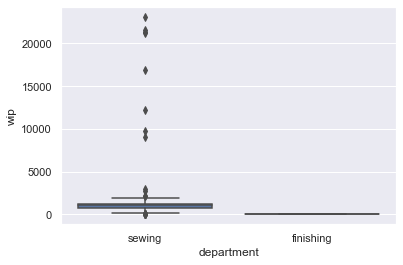

In [104]:
sns.set_style("darkgrid")
sns.set(font_scale=1)
sns.boxplot(x='department',y='wip',data=df)
plt.show()

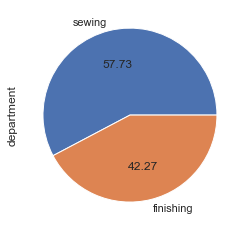

In [40]:
sns.set_style("darkgrid")
sns.set(font_scale=1)
df['department'].value_counts().plot(kind='pie', autopct="%.2f")
plt.show()

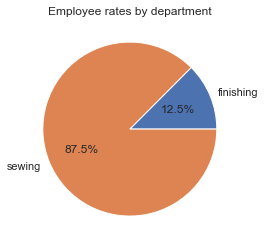

In [41]:
sns.set_style("darkgrid")
sns.set(font_scale=1)
data = df.groupby(['department']).no_of_workers.sum()
data.plot.pie(title="Employee rates by department",autopct='%1.1f%%')
plt.ylabel(None)
plt.show()

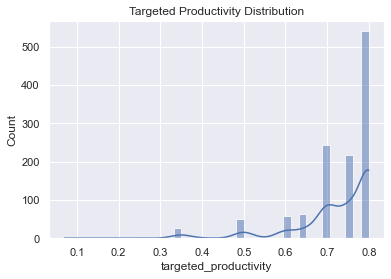

In [42]:
sns.set_theme(style='darkgrid')
sns.set(font_scale=1)
sns.histplot(data=df['targeted_productivity'],kde=True)
plt.title('Targeted Productivity Distribution')
plt.show()

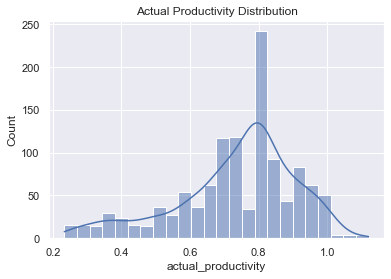

In [43]:
sns.set_theme(style='darkgrid')
sns.set(font_scale=1)
sns.histplot(data=df['actual_productivity'],kde=True)
plt.title('Actual Productivity Distribution')
plt.show()

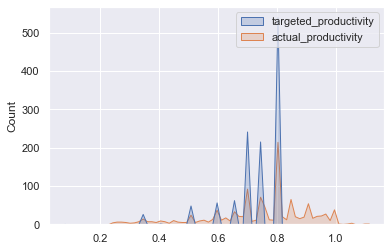

In [44]:
sns.set_style("darkgrid")
sns.set(font_scale=1)
sns.histplot(data=df[['targeted_productivity', 'actual_productivity']], element='poly')
plt.show()

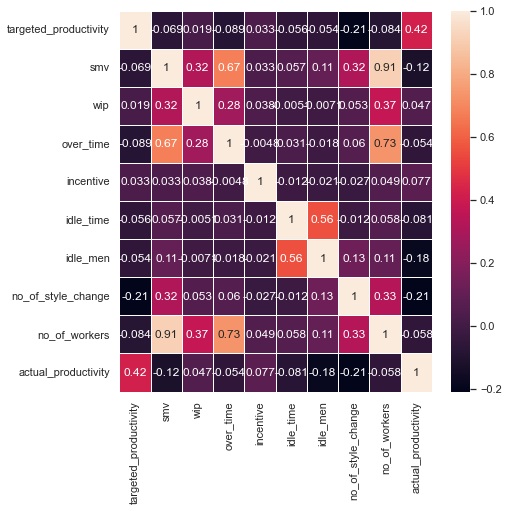

In [45]:
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()

In [46]:
df['day'].value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

In [47]:
fig = px.histogram(df, x="targeted_productivity", y="incentive",
             color='department', barmode='group',
             height=400)
fig.show()

Text(0.5, 1.0, 'Numeric Variables Correlating with Actual Productivity')

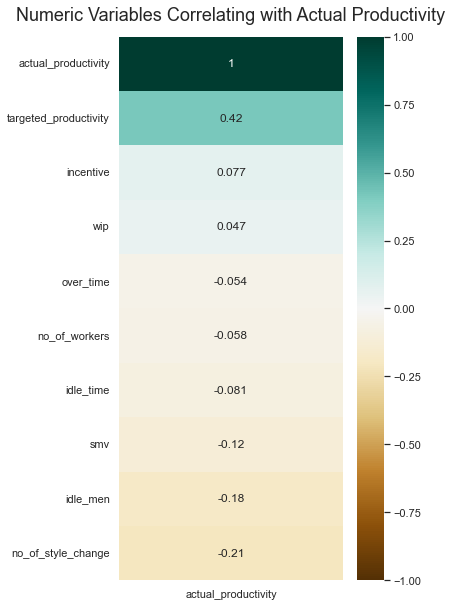

In [48]:
corrMatrix = df.corr()
plt.figure(figsize=(5, 10))
heatmap = sns.heatmap(corrMatrix[['actual_productivity']].sort_values(by='actual_productivity', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Numeric Variables Correlating with Actual Productivity', fontdict={'fontsize':18}, pad=16)

In [131]:
df.drop(columns='date', inplace=True)
df = pd.get_dummies(df,drop_first=False, columns=['team', 'quarter', 'day','department'])

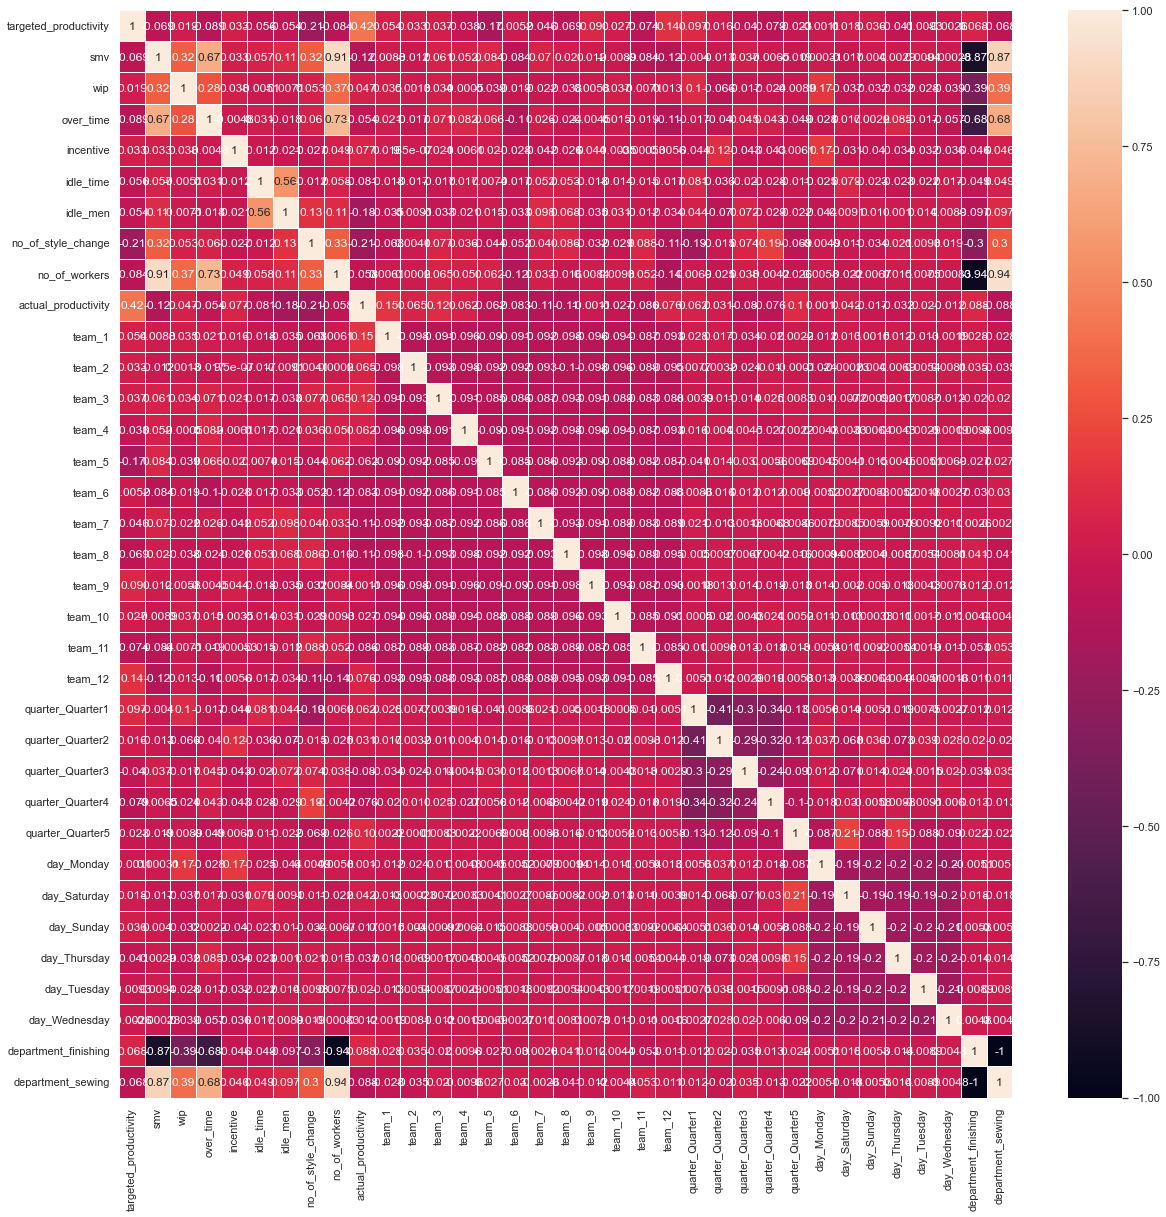

In [50]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

Text(0.5, 1.0, 'Variables Correlating with Actual Productivity')

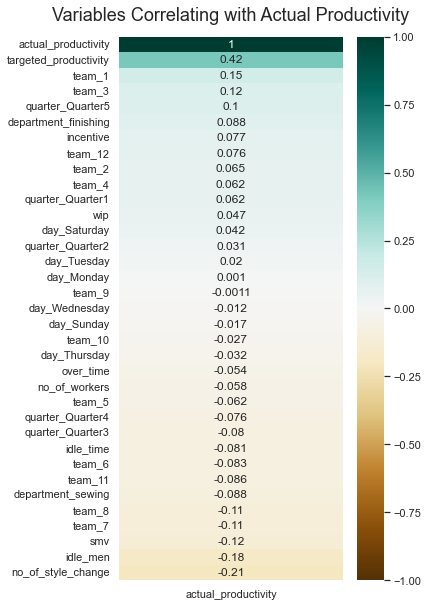

In [51]:
corrMatrix = df.corr()

plt.figure(figsize=(5, 10))
heatmap = sns.heatmap(corrMatrix[['actual_productivity']].sort_values(by='actual_productivity', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Variables Correlating with Actual Productivity', fontdict={'fontsize':18}, pad=16)

### Model Data

#### Test with Numeric Variable (No Data Prep)

In [125]:
x = df[['targeted_productivity', 'incentive', 'wip']]
y = df['actual_productivity']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [127]:
Regmodel = LinearRegression()  
Regmodel.fit(X_train,y_train)

LinearRegression()

In [128]:
print("Intercept: ", Regmodel.intercept_)
print("Coefficients:")
list(zip(x, Regmodel.coef_))

Intercept:  0.17970131240670661
Coefficients:


[('targeted_productivity', 0.7529432456823606),
 ('incentive', 5.433903423052977e-05),
 ('wip', 3.7453909376668337e-06)]

In [129]:
y_pred= Regmodel.predict(X_test)
y_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
y_diff.head(10)

,Actual value,Predicted value
921,0.268214,0.634119
321,0.800359,0.788623
101,0.681061,0.782056
920,0.325000,0.706762
58,0.667604,0.782056
790,0.800980,0.783783
948,0.768847,0.556173
969,0.768847,0.556173
410,0.650417,0.675378
1079,0.750396,0.751453


In [130]:
print('R squared: {:.2f}'.format(r2_score(y_test,y_pred)*100))

R squared: 14.54


#### Prep Data

In [21]:
df.drop(columns = ['smv', 'over_time', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers'], inplace=True)

In [22]:
df

,targeted_productivity,wip,incentive,actual_productivity,team_1,team_2,team_3,team_4,team_5,team_6,...,quarter_Quarter4,quarter_Quarter5,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,department_finishing,department_sewing
0,0.80,1108.0,98,0.940725,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0.75,0.0,0,0.886500,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0.80,968.0,50,0.800570,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0.80,968.0,50,0.800570,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0.80,1170.0,50,0.800382,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,0.75,0.0,0,0.628333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1193,0.70,0.0,0,0.625625,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1194,0.65,0.0,0,0.625625,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1195,0.75,0.0,0,0.505889,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [23]:
#df.to_csv('prepped_df.csv', index = False)

In [25]:
X = df.drop('actual_productivity',axis=1)
y = df['actual_productivity']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
Regmodel = LinearRegression()  
Regmodel.fit(X_train,y_train)

LinearRegression()

In [29]:
print("Intercept: ", Regmodel.intercept_)
print("Coefficients:")
list(zip(X, Regmodel.coef_))

Intercept:  0.2370206161094741
Coefficients:


[('targeted_productivity', 0.6945469004329595),
 ('wip', 6.343784157245691e-06),
 ('incentive', 4.7792597884483336e-05),
 ('team_1', 0.07641828771508634),
 ('team_2', 0.022473235963454255),
 ('team_3', 0.05963938807001286),
 ('team_4', 0.04658636563941659),
 ('team_5', 0.015260515174085042),
 ('team_6', -0.03506473534013779),
 ('team_7', -0.059980782932407266),
 ('team_8', -0.03434974708239779),
 ('team_9', -0.02495802612259734),
 ('team_10', -0.053903070453454195),
 ('team_11', -0.029889124915148217),
 ('team_12', 0.017767694284087247),
 ('quarter_Quarter1', -0.008849290759613299),
 ('quarter_Quarter2', -0.0161877345415855),
 ('quarter_Quarter3', -0.0312743835619079),
 ('quarter_Quarter4', -0.03177287404511012),
 ('quarter_Quarter5', 0.08808428290821714),
 ('day_Monday', -0.004915330026096098),
 ('day_Saturday', 0.01793192000709787),
 ('day_Sunday', -0.003121508912303427),
 ('day_Thursday', -0.02162418077872198),
 ('day_Tuesday', 0.01967565162745456),
 ('day_Wednesday', -0.00794655191

In [30]:
y_pred= Regmodel.predict(X_test)
y_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
y_diff.head(10)

,Actual value,Predicted value
921,0.268214,0.709732
321,0.800359,0.717485
101,0.681061,0.781964
920,0.325000,0.746409
58,0.667604,0.733536
790,0.800980,0.761824
948,0.768847,0.620145
969,0.768847,0.659701
410,0.650417,0.611283
1079,0.750396,0.699611


In [31]:
print('R squared: {:.2f}'.format(r2_score(y_test,y_pred)*100))

R squared: 13.93


#### Full-model Approach

In [52]:
X = df.drop('actual_productivity',axis=1)
y = df['actual_productivity']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
Regmodel = LinearRegression()  
Regmodel.fit(X_train,y_train)

LinearRegression()

In [55]:
print("Intercept: ", Regmodel.intercept_)
print("Coefficients:")
list(zip(X, Regmodel.coef_))

Intercept:  0.2023669582882469
Coefficients:


[('targeted_productivity', 0.666540095967443),
 ('smv', -0.00798337466684236),
 ('wip', 3.5091223237229767e-06),
 ('over_time', -5.323210683737059e-06),
 ('incentive', 3.4492078271261516e-05),
 ('idle_time', 0.0001495162185924363),
 ('idle_men', -0.008712923215946413),
 ('no_of_style_change', -0.03898875934743662),
 ('no_of_workers', 0.00629818605820854),
 ('team_1', 0.06981777596035457),
 ('team_2', 0.016884494425447434),
 ('team_3', 0.05517257029599678),
 ('team_4', 0.043623063357723695),
 ('team_5', 0.01446443442561158),
 ('team_6', -0.00932865205529312),
 ('team_7', -0.04671709730999817),
 ('team_8', -0.019775723103823174),
 ('team_9', -0.03468849781959884),
 ('team_10', -0.05475201154791824),
 ('team_11', -0.06971263829874778),
 ('team_12', 0.03501228167024287),
 ('quarter_Quarter1', -0.01493031927054924),
 ('quarter_Quarter2', -0.019124401282368975),
 ('quarter_Quarter3', -0.02224695103881931),
 ('quarter_Quarter4', -0.026696960926943344),
 ('quarter_Quarter5', 0.0829986325186889

In [56]:
y_pred= Regmodel.predict(X_test)
y_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
y_diff.head(10)

,Actual value,Predicted value
921,0.268214,0.641381
321,0.800359,0.733729
101,0.681061,0.787556
920,0.325000,0.740368
58,0.667604,0.743444
790,0.800980,0.804264
948,0.768847,0.605143
969,0.768847,0.644377
410,0.650417,0.661693
1079,0.750396,0.735686


In [57]:
print('R squared: {:.2f}'.format(r2_score(y_test,y_pred)*100))

R squared: 15.84


#### Improve Accuracy of Model

In [132]:
df['actual_productivity'].skew()

-0.8074917745097576

In [133]:
boxcox_actual = stats.boxcox(df['actual_productivity'])
box_cox_param = boxcox_actual[1]

boxcox_actual = pd.Series(boxcox_actual[0])

In [134]:
df['actual_productivity'] = boxcox_actual

In [135]:
df['actual_productivity'].skew()

-0.1386649762614521

In [136]:
df.drop(columns = ['over_time'], inplace=True)

In [137]:
X = df.drop('actual_productivity',axis=1)
y = df['actual_productivity']

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [139]:
numeric=['wip', 'incentive']
sc=StandardScaler()
X_train[numeric]=sc.fit_transform(X_train[numeric])
X_test[numeric]=sc.transform(X_test[numeric])

In [140]:
Regmodel = LinearRegression()  
Regmodel.fit(X_train,y_train)

LinearRegression()

In [141]:
print("Intercept: ", Regmodel.intercept_)
print("Coefficients:")
list(zip(X, Regmodel.coef_))

Intercept:  -0.548800298121326
Coefficients:


[('targeted_productivity', 0.41365972753310687),
 ('smv', -0.005233328078311032),
 ('wip', 0.004420631039334337),
 ('incentive', 0.00427410223374057),
 ('idle_time', 8.562207832131019e-05),
 ('idle_men', -0.004169757737425548),
 ('no_of_style_change', -0.023382919378421428),
 ('no_of_workers', 0.003946695318855233),
 ('team_1', 0.05248761942006412),
 ('team_2', 0.01541681980747779),
 ('team_3', 0.03779157089850841),
 ('team_4', 0.024986684059788742),
 ('team_5', 0.0050993259532611775),
 ('team_6', -0.00497016158867176),
 ('team_7', -0.032511695014671),
 ('team_8', -0.01737999263450347),
 ('team_9', -0.023813501249352133),
 ('team_10', -0.033827956946491544),
 ('team_11', -0.04707574925551647),
 ('team_12', 0.023797036550103425),
 ('quarter_Quarter1', -0.012153479167562289),
 ('quarter_Quarter2', -0.01515361684775834),
 ('quarter_Quarter3', -0.018907443545846222),
 ('quarter_Quarter4', -0.020866611789634244),
 ('quarter_Quarter5', 0.06708115135080774),
 ('day_Monday', -0.004148971959747

In [142]:
y_pred= Regmodel.predict(X_test)
y_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
y_diff.head(10)

,Actual value,Predicted value
921,-0.455217,-0.272661
321,-0.178817,-0.222222
101,-0.265911,-0.180745
920,-0.439337,-0.203260
58,-0.274813,-0.206642
790,-0.178325,-0.202282
948,-0.203253,-0.279838
969,-0.203253,-0.250722
410,-0.285913,-0.255606
1079,-0.217083,-0.223913


In [143]:
print('R squared: {:.2f}'.format(r2_score(y_test,y_pred)*100))

R squared: 20.29


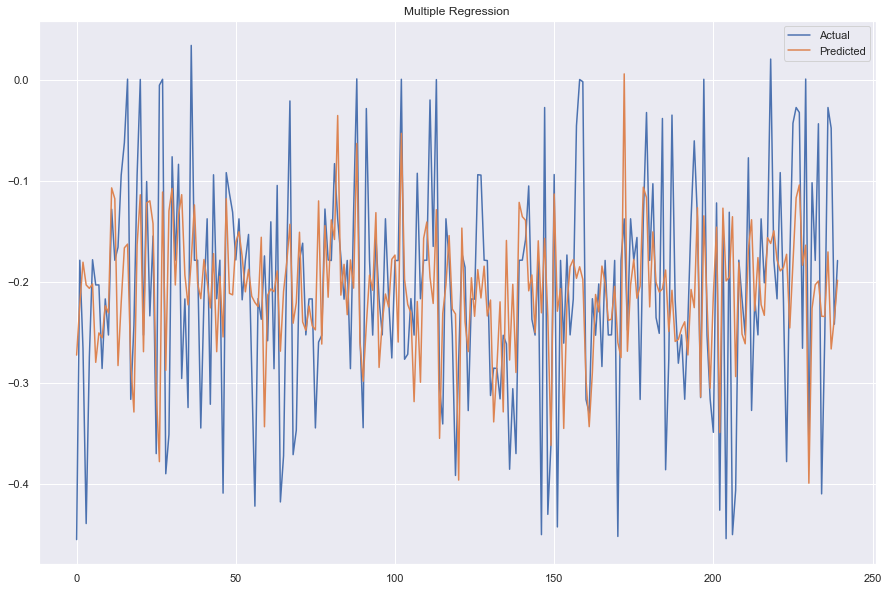

In [152]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(15,10))
sns.set(font_scale=1)
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Actual")
plt.plot(x_ax, y_pred, label="Predicted")
plt.title("Multiple Regression")
plt.legend()
plt.show()